In [1]:
!pwd

/Users/guillaume/code/tomaymerich14/resto-project/notebooks


### imports

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Daroco Bourse - CA - 1er Janvier 2019 à Août 2021

In [3]:
df_db=pd.read_excel('/Users/guillaume/code/tomaymerich14/resto-project/raw_data/CA_DarocoBourse.xlsx')

In [4]:
df_db.head(30)

,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA
0,2019,12,30,[22h à 23h[,Lundi,2607.5,2310.000000,297.500000
1,2019,12,3,[19h à 20h[,Mardi,2597.0,2292.803030,304.196970
2,2019,12,6,[21h à 22h[,Vendredi,1893.0,1654.924242,238.075758
3,2019,12,9,[22h à 23h[,Lundi,902.0,788.484848,113.515152
4,2019,12,11,[18h à 19h[,Mercredi,114.0,95.454545,18.545455
5,2019,12,5,[13h à 14h[,Jeudi,1059.0,956.666667,102.333333
6,2019,12,16,[22h à 23h[,Lundi,1373.5,1205.378788,168.121212
7,2019,12,18,[19h à 20h[,Mercredi,1860.5,1631.515152,228.984848
8,2019,12,21,[19h à 20h[,Samedi,2208.0,1956.060606,251.939394
9,2019,12,23,[01h à 02h[,Lundi,0.0,0.000000,0.000000


In [5]:
df_db['Date']=''

In [6]:
for i in range(df_db.shape[0]):
        df_db['Date'][i] = f"{df_db['Jour du mois'][i]}-{df_db['Mois'][i]}-{df_db['Année'][i]}"
df_db.head()

/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_18933/684880584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_db['Date'][i] = f"{df_db['Jour du mois'][i]}-{df_db['Mois'][i]}-{df_db['Année'][i]}"


,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,Date
0,2019,12,30,[22h à 23h[,Lundi,2607.5,2310.000000,297.500000,30-12-2019
1,2019,12,3,[19h à 20h[,Mardi,2597.0,2292.803030,304.196970,3-12-2019
2,2019,12,6,[21h à 22h[,Vendredi,1893.0,1654.924242,238.075758,6-12-2019
3,2019,12,9,[22h à 23h[,Lundi,902.0,788.484848,113.515152,9-12-2019
4,2019,12,11,[18h à 19h[,Mercredi,114.0,95.454545,18.545455,11-12-2019


In [7]:
df_db['Date']=pd.to_datetime(df_db['Date'],format='%d-%m-%Y',dayfirst=True)
df_db.dtypes

Année                          int64
Mois                           int64
Jour du mois                   int64
Tranche Horaire               object
Jour de la semaine            object
CA TTC                       float64
CA HT                        float64
TVA                          float64
Date                  datetime64[ns]
dtype: object

In [8]:
df_db['Date']

0      2019-12-30
1      2019-12-03
2      2019-12-06
3      2019-12-09
4      2019-12-11
          ...    
7878   2020-01-21
7879   2019-01-07
7880   2020-01-23
7881   2019-01-09
7882   2020-01-11
Name: Date, Length: 7883, dtype: datetime64[ns]

In [9]:
df_db_new=df_db.sort_values(by='Date')

In [10]:
df_db_new

,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,Date
7875,2019,1,1,[21h à 22h[,Mardi,2073.0,1836.590909,236.409091,2019-01-01
7195,2019,1,1,[00h à 01h[,Mardi,40.0,36.363636,3.636364,2019-01-01
7451,2019,1,1,[20h à 21h[,Mardi,1780.0,1581.742424,198.257576,2019-01-01
7781,2019,1,1,[19h à 20h[,Mardi,3494.5,3083.181818,411.318182,2019-01-01
7289,2019,1,1,[23h à 00h[,Mardi,404.0,359.242424,44.757576,2019-01-01
...,...,...,...,...,...,...,...,...,...
2277,2021,8,21,[00h à 01h[,Samedi,0.0,0.000000,0.000000,2021-08-21
2693,2021,8,21,[19h à 20h[,Samedi,3350.8,2974.909091,375.890909,2021-08-21
2194,2021,8,21,[20h à 21h[,Samedi,1899.8,1663.393939,236.406061,2021-08-21
2970,2021,8,21,[23h à 00h[,Samedi,584.0,502.651515,81.348485,2021-08-21


In [11]:
df_db_new['Tranche Horaire'].unique()

array(['[21h à 22h[', '[00h à 01h[', '[20h à 21h[', '[19h à 20h[',
       '[23h à 00h[', '[22h à 23h[', '[15h à 16h[', '[01h à 02h[',
       '[12h à 13h[', '[14h à 15h[', '[13h à 14h[', '[10h à 11h[',
       '[18h à 19h[', '[17h à 18h[', '[16h à 17h[', '[11h à 12h[',
       '[02h à 03h[', '[09h à 10h[', '[03h à 04h['], dtype=object)

In [12]:
df_db_new['Tranche Horaire']

7875    [21h à 22h[
7195    [00h à 01h[
7451    [20h à 21h[
7781    [19h à 20h[
7289    [23h à 00h[
           ...     
2277    [00h à 01h[
2693    [19h à 20h[
2194    [20h à 21h[
2970    [23h à 00h[
2887    [21h à 22h[
Name: Tranche Horaire, Length: 7883, dtype: object

 ------------------------------------------brouillon--------------------   
 
 `'''conditions = [
    (df_db_new['Tranche Horaire']=='[09h à 10h['),
    (df_db_new['Tranche Horaire']=='[10h à 11h['),
    (df_db_new['Tranche Horaire']=='[11h à 12h['),
    (df_db_new['Tranche Horaire']=='[12h à 13h['),
    (df_db_new['Tranche Horaire']=='[13h à 14h['),
    (df_db_new['Tranche Horaire']=='[14h à 15h['),
    (df_db_new['Tranche Horaire']=='[15h à 16h['),
    (df_db_new['Tranche Horaire']=='[16h à 17h['),
    (df_db_new['Tranche Horaire']=='[17h à 18h['),
    (df_db_new['Tranche Horaire']=='[18h à 19h['),
    (df_db_new['Tranche Horaire']=='[19h à 20h['),
    (df_db_new['Tranche Horaire']=='[20h à 21h['),
    (df_db_new['Tranche Horaire']=='[21h à 22h['),
    (df_db_new['Tranche Horaire']=='[22h à 23h['),
    (df_db_new['Tranche Horaire']=='[23h à 00h['),
    (df_db_new['Tranche Horaire']=='[00h à 01h['),
    (df_db_new['Tranche Horaire']=='[01h à 02h['),
    (df_db_new['Tranche Horaire']=='[02h à 03h['),
    (df_db_new['Tranche Horaire']=='[03h à 04h['),
    ]`
    
`df_db_new['Service']=np.select(conditions,values)    '''`


  
  
 


In [13]:
service_dict = {
    '[09h à 10h[':'midi',
    '[10h à 11h[':'midi',
    '[11h à 12h[':'midi',
    '[12h à 13h[':'midi',
    '[13h à 14h[':'midi',
    '[14h à 15h[':'midi',
    '[15h à 16h[':'midi',
    '[16h à 17h[':'midi',
    '[17h à 18h[':'midi',
    '[18h à 19h[':'soir',
    '[19h à 20h[':'soir',
    '[20h à 21h[':'soir',
    '[21h à 22h[':'soir',
    '[22h à 23h[':'soir',
    '[23h à 00h[':'soir',
    '[00h à 01h[':'soir',
    '[01h à 02h[':'soir',
    '[02h à 03h[':'soir',
    '[03h à 04h[':'soir',
}

In [14]:
df_db_new['Service']=df_db_new['Tranche Horaire'].map(service_dict)

In [15]:
df_db_new.tail(30)

,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,Date,Service
2443,2021,8,19,[01h à 02h[,Jeudi,0.0,0.000000,0.000000,2021-08-19,soir
2470,2021,8,19,[23h à 00h[,Jeudi,359.0,308.990737,50.009263,2021-08-19,soir
2664,2021,8,19,[19h à 20h[,Jeudi,2023.5,1790.000000,233.500000,2021-08-19,soir
2553,2021,8,19,[13h à 14h[,Jeudi,638.0,574.090909,63.909091,2021-08-19,midi
2165,2021,8,19,[22h à 23h[,Jeudi,1692.5,1487.121212,205.378788,2021-08-19,soir
2249,2021,8,19,[15h à 16h[,Jeudi,22.0,20.000000,2.000000,2021-08-19,midi
2276,2021,8,19,[14h à 15h[,Jeudi,600.5,540.000000,60.500000,2021-08-19,midi
2527,2021,8,20,[19h à 20h[,Vendredi,3046.0,2685.227273,360.772727,2021-08-20,soir
2111,2021,8,20,[17h à 18h[,Vendredi,0.0,0.000000,0.000000,2021-08-20,midi
2333,2021,8,20,[13h à 14h[,Vendredi,931.5,837.424242,94.075758,2021-08-20,midi


In [16]:
#df_db_new['Date']=np.where((df_db_new['Tranche Horaire'])=='[00h à 01h['or\
#                           (df_db_new['Tranche Horaire'])=='[01h à 02h['or\
#                           (df_db_new['Tranche Horaire'])=='[02h à 03h['or\
#                           (df_db_new['Tranche Horaire'])=='[03h à 04h[',
#                          df_db_new['Date']-1,df_db_new['Date'])

df_db_new['Date']=np.where(df_db_new['Tranche Horaire']=='[00h à 01h[',df_db_new['Date']- pd.offsets.Day(1),df_db_new['Date'])
df_db_new['Date']=np.where(df_db_new['Tranche Horaire']=='[01h à 02h[',df_db_new['Date']- pd.offsets.Day(1),df_db_new['Date'])
df_db_new['Date']=np.where(df_db_new['Tranche Horaire']=='[02h à 03h[',df_db_new['Date']- pd.offsets.Day(1),df_db_new['Date'])
df_db_new['Date']=np.where(df_db_new['Tranche Horaire']=='[03h à 04h[',df_db_new['Date']- pd.offsets.Day(1),df_db_new['Date'])

In [17]:
df_db_1=df_db_new.sort_values(by='Date')
df_db_1=df_db_1.iloc[1: , :]

In [18]:
df_db_1

,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,Date,Service
7875,2019,1,1,[21h à 22h[,Mardi,2073.0,1836.590909,236.409091,2019-01-01,soir
7451,2019,1,1,[20h à 21h[,Mardi,1780.0,1581.742424,198.257576,2019-01-01,soir
7781,2019,1,1,[19h à 20h[,Mardi,3494.5,3083.181818,411.318182,2019-01-01,soir
7289,2019,1,1,[23h à 00h[,Mardi,404.0,359.242424,44.757576,2019-01-01,soir
7616,2019,1,1,[22h à 23h[,Mardi,565.5,501.060606,64.439394,2019-01-01,soir
...,...,...,...,...,...,...,...,...,...,...
2775,2021,8,21,[15h à 16h[,Samedi,44.5,39.848485,4.651515,2021-08-21,midi
2388,2021,8,21,[13h à 14h[,Samedi,1306.5,1172.575758,133.924242,2021-08-21,midi
2471,2021,8,21,[18h à 19h[,Samedi,183.0,152.500000,30.500000,2021-08-21,soir
2500,2021,8,21,[12h à 13h[,Samedi,863.5,772.045455,91.454545,2021-08-21,midi


In [19]:
df_db_2=df_db_1.drop(columns=['Année','Mois','Jour du mois'])

In [20]:
df_db_2.head(1)

,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,Date,Service
7875,[21h à 22h[,Mardi,2073.0,1836.590909,236.409091,2019-01-01,soir


In [21]:
df_db_2.shape

(7882, 7)

In [22]:
df_db_2.dtypes

Tranche Horaire               object
Jour de la semaine            object
CA TTC                       float64
CA HT                        float64
TVA                          float64
Date                  datetime64[ns]
Service                       object
dtype: object

In [23]:
df_db_2.head(10)

,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,Date,Service
7875,[21h à 22h[,Mardi,2073.0,1836.590909,236.409091,2019-01-01,soir
7451,[20h à 21h[,Mardi,1780.0,1581.742424,198.257576,2019-01-01,soir
7781,[19h à 20h[,Mardi,3494.5,3083.181818,411.318182,2019-01-01,soir
7289,[23h à 00h[,Mardi,404.0,359.242424,44.757576,2019-01-01,soir
7616,[22h à 23h[,Mardi,565.5,501.060606,64.439394,2019-01-01,soir
7171,[00h à 01h[,Mercredi,28.0,23.333333,4.666667,2019-01-01,soir
7336,[01h à 02h[,Mercredi,0.0,0.000000,0.000000,2019-01-01,soir
7641,[00h à 01h[,Jeudi,145.0,121.515152,23.484848,2019-01-02,soir
7264,[13h à 14h[,Mercredi,2077.5,1866.363636,211.136364,2019-01-02,midi
7427,[14h à 15h[,Mercredi,730.0,652.196970,77.803030,2019-01-02,midi


In [24]:
Week_days={'Lundi':'Dimanche','Mardi':'Lundi','Mercredi':'Mardi','Jeudi':'Mercredi','Vendredi':'Jeudi','Samedi':'Vendredi','Dimanche':'Samedi'}
Over_night_hours=['[00h à 01h[','[01h à 02h[','[02h à 03h[','[03h à 04h[']

In [25]:
#df_db_2.loc[df_db_2['Tranche Horaire'] == '[03h à 04h[']['Jour de la semaine']#.map(Week_days)

In [26]:
df_db_2.loc[df_db_2['Tranche Horaire'] == '[00h à 01h[','Jour de la semaine']=\
df_db_2.loc[df_db_2['Tranche Horaire'] == '[00h à 01h[']['Jour de la semaine'].map(Week_days)

df_db_2.loc[df_db_2['Tranche Horaire'] == '[01h à 02h[','Jour de la semaine']=\
df_db_2.loc[df_db_2['Tranche Horaire'] == '[01h à 02h[']['Jour de la semaine'].map(Week_days)

df_db_2.loc[df_db_2['Tranche Horaire'] == '[02h à 03h[','Jour de la semaine']=\
df_db_2.loc[df_db_2['Tranche Horaire'] == '[02h à 03h[']['Jour de la semaine'].map(Week_days)

df_db_2.loc[df_db_2['Tranche Horaire'] == '[03h à 04h[','Jour de la semaine']=\
df_db_2.loc[df_db_2['Tranche Horaire'] == '[03h à 04h[']['Jour de la semaine'].map(Week_days)

In [27]:
df_db_2.tail(30)


,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,Date,Service
2553,[13h à 14h[,Jeudi,638.0,574.090909,63.909091,2021-08-19,midi
2418,[00h à 01h[,Jeudi,257.0,214.166667,42.833333,2021-08-19,soir
2664,[19h à 20h[,Jeudi,2023.5,1790.000000,233.500000,2021-08-19,soir
2747,[18h à 19h[,Jeudi,174.0,145.454545,28.545455,2021-08-19,soir
2360,[21h à 22h[,Jeudi,2213.0,1945.909091,267.090909,2021-08-19,soir
2969,[20h à 21h[,Jeudi,2594.5,2301.818182,292.681818,2021-08-19,soir
2858,[12h à 13h[,Jeudi,457.0,410.000000,47.000000,2021-08-19,midi
2470,[23h à 00h[,Jeudi,359.0,308.990737,50.009263,2021-08-19,soir
2610,[14h à 15h[,Vendredi,776.0,683.787879,92.212121,2021-08-20,midi
2804,[15h à 16h[,Vendredi,134.0,115.303030,18.696970,2021-08-20,midi


In [28]:
df_db_2['Jour de la semaine'].unique(),df_db_2['Service'].unique()


(array(['Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche',
        'Lundi'], dtype=object),
 array(['soir', 'midi'], dtype=object))

In [29]:
df_db_2.shape

(7882, 7)

In [30]:
df_db_2['Service']=='soir'

7875     True
7451     True
7781     True
7289     True
7616     True
        ...  
2775    False
2388    False
2471     True
2500    False
2887     True
Name: Service, Length: 7882, dtype: bool

In [31]:
df_db_2['Timestamp']=np.where(df_db_2['Service']=='midi',\
                              df_db_2['Date']+pd.tseries.offsets.DateOffset(hours=12),\
                              df_db_2['Date']+pd.tseries.offsets.DateOffset(hours=18))


In [32]:
df_db_2.tail(10)

,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,Date,Service,Timestamp
2194,[20h à 21h[,Samedi,1899.8,1663.393939,236.406061,2021-08-21,soir,2021-08-21 18:00:00
2693,[19h à 20h[,Samedi,3350.8,2974.909091,375.890909,2021-08-21,soir,2021-08-21 18:00:00
2306,[14h à 15h[,Samedi,800.5,717.121212,83.378788,2021-08-21,midi,2021-08-21 12:00:00
2970,[23h à 00h[,Samedi,584.0,502.651515,81.348485,2021-08-21,soir,2021-08-21 18:00:00
2580,[22h à 23h[,Samedi,2333.7,2040.893939,292.806061,2021-08-21,soir,2021-08-21 18:00:00
2775,[15h à 16h[,Samedi,44.5,39.848485,4.651515,2021-08-21,midi,2021-08-21 12:00:00
2388,[13h à 14h[,Samedi,1306.5,1172.575758,133.924242,2021-08-21,midi,2021-08-21 12:00:00
2471,[18h à 19h[,Samedi,183.0,152.500000,30.500000,2021-08-21,soir,2021-08-21 18:00:00
2500,[12h à 13h[,Samedi,863.5,772.045455,91.454545,2021-08-21,midi,2021-08-21 12:00:00
2887,[21h à 22h[,Samedi,2714.9,2382.530303,332.369697,2021-08-21,soir,2021-08-21 18:00:00


In [33]:
#df_db_2['Date']+pd.tseries.offsets.DateOffset(hours=12)

In [34]:
df_yes=df_db_2.set_index('Timestamp')
df_yes.sort_index(inplace=True)

In [35]:
df_yes.head(30)

,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,Date,Service
Timestamp,,,,,,,
2019-01-01 18:00:00,[21h à 22h[,Mardi,2073.0,1836.590909,236.409091,2019-01-01,soir
2019-01-01 18:00:00,[20h à 21h[,Mardi,1780.0,1581.742424,198.257576,2019-01-01,soir
2019-01-01 18:00:00,[19h à 20h[,Mardi,3494.5,3083.181818,411.318182,2019-01-01,soir
2019-01-01 18:00:00,[23h à 00h[,Mardi,404.0,359.242424,44.757576,2019-01-01,soir
2019-01-01 18:00:00,[22h à 23h[,Mardi,565.5,501.060606,64.439394,2019-01-01,soir
2019-01-01 18:00:00,[00h à 01h[,Mardi,28.0,23.333333,4.666667,2019-01-01,soir
2019-01-01 18:00:00,[01h à 02h[,Mardi,0.0,0.000000,0.000000,2019-01-01,soir
2019-01-02 12:00:00,[13h à 14h[,Mercredi,2077.5,1866.363636,211.136364,2019-01-02,midi
2019-01-02 12:00:00,[14h à 15h[,Mercredi,730.0,652.196970,77.803030,2019-01-02,midi


In [36]:
test1=df_yes.groupby(['Timestamp']).sum()
test1

,CA TTC,CA HT,TVA
Timestamp,,,
2019-01-01 18:00:00,8345.0,7385.151515,959.848485
2019-01-02 12:00:00,3939.0,3543.257576,395.742424
2019-01-02 18:00:00,9045.5,7948.333333,1097.166667
2019-01-03 12:00:00,4836.0,4311.969697,524.030303
2019-01-03 18:00:00,10024.0,8819.166667,1204.833333
...,...,...,...
2021-08-19 18:00:00,9313.5,8193.460434,1120.039566
2021-08-20 12:00:00,2539.0,2259.166667,279.833333
2021-08-20 18:00:00,10948.5,9639.848485,1308.651515


In [37]:
test2=df_yes.groupby(['Timestamp','Date','Jour de la semaine','Service']).sum()
test2

,,,,CA TTC,CA HT,TVA
Timestamp,Date,Jour de la semaine,Service,,,
2019-01-01 18:00:00,2019-01-01,Mardi,soir,8345.0,7385.151515,959.848485
2019-01-02 12:00:00,2019-01-02,Mercredi,midi,3939.0,3543.257576,395.742424
2019-01-02 18:00:00,2019-01-02,Mercredi,soir,9045.5,7948.333333,1097.166667
2019-01-03 12:00:00,2019-01-03,Jeudi,midi,4836.0,4311.969697,524.030303
2019-01-03 18:00:00,2019-01-03,Jeudi,soir,10024.0,8819.166667,1204.833333
...,...,...,...,...,...,...
2021-08-19 18:00:00,2021-08-19,Jeudi,soir,9313.5,8193.460434,1120.039566
2021-08-20 12:00:00,2021-08-20,Vendredi,midi,2539.0,2259.166667,279.833333
2021-08-20 18:00:00,2021-08-20,Vendredi,soir,10948.5,9639.848485,1308.651515


In [38]:
test2['CA HT']=round(test2['CA HT'],2)
test2['TVA']=round(test2['TVA'],2)

In [39]:
test2

,,,,CA TTC,CA HT,TVA
Timestamp,Date,Jour de la semaine,Service,,,
2019-01-01 18:00:00,2019-01-01,Mardi,soir,8345.0,7385.15,959.85
2019-01-02 12:00:00,2019-01-02,Mercredi,midi,3939.0,3543.26,395.74
2019-01-02 18:00:00,2019-01-02,Mercredi,soir,9045.5,7948.33,1097.17
2019-01-03 12:00:00,2019-01-03,Jeudi,midi,4836.0,4311.97,524.03
2019-01-03 18:00:00,2019-01-03,Jeudi,soir,10024.0,8819.17,1204.83
...,...,...,...,...,...,...
2021-08-19 18:00:00,2021-08-19,Jeudi,soir,9313.5,8193.46,1120.04
2021-08-20 12:00:00,2021-08-20,Vendredi,midi,2539.0,2259.17,279.83
2021-08-20 18:00:00,2021-08-20,Vendredi,soir,10948.5,9639.85,1308.65


In [40]:
test2.index

MultiIndex([('2019-01-01 18:00:00', '2019-01-01',    'Mardi', 'soir'),
            ('2019-01-02 12:00:00', '2019-01-02', 'Mercredi', 'midi'),
            ('2019-01-02 18:00:00', '2019-01-02', 'Mercredi', 'soir'),
            ('2019-01-03 12:00:00', '2019-01-03',    'Jeudi', 'midi'),
            ('2019-01-03 18:00:00', '2019-01-03',    'Jeudi', 'soir'),
            ('2019-01-04 12:00:00', '2019-01-04', 'Vendredi', 'midi'),
            ('2019-01-04 18:00:00', '2019-01-04', 'Vendredi', 'soir'),
            ('2019-01-05 12:00:00', '2019-01-05',   'Samedi', 'midi'),
            ('2019-01-05 18:00:00', '2019-01-05',   'Samedi', 'soir'),
            ('2019-01-06 12:00:00', '2019-01-06', 'Dimanche', 'midi'),
            ...
            ('2021-08-17 12:00:00', '2021-08-17',    'Mardi', 'midi'),
            ('2021-08-17 18:00:00', '2021-08-17',    'Mardi', 'soir'),
            ('2021-08-18 12:00:00', '2021-08-18', 'Mercredi', 'midi'),
            ('2021-08-18 18:00:00', '2021-08-18', 'Mercredi',

In [41]:
test2=test2.reset_index(level=[1,2,3])

In [42]:
test2.head(30)

,Date,Jour de la semaine,Service,CA TTC,CA HT,TVA
Timestamp,,,,,,
2019-01-01 18:00:00,2019-01-01,Mardi,soir,8345.00,7385.15,959.85
2019-01-02 12:00:00,2019-01-02,Mercredi,midi,3939.00,3543.26,395.74
2019-01-02 18:00:00,2019-01-02,Mercredi,soir,9045.50,7948.33,1097.17
2019-01-03 12:00:00,2019-01-03,Jeudi,midi,4836.00,4311.97,524.03
2019-01-03 18:00:00,2019-01-03,Jeudi,soir,10024.00,8819.17,1204.83
2019-01-04 12:00:00,2019-01-04,Vendredi,midi,4806.00,4327.35,478.65
2019-01-04 18:00:00,2019-01-04,Vendredi,soir,13987.50,12301.85,1685.65
2019-01-05 12:00:00,2019-01-05,Samedi,midi,4466.50,3997.73,468.77
2019-01-05 18:00:00,2019-01-05,Samedi,soir,11756.00,10286.55,1469.45


In [43]:
test2

,Date,Jour de la semaine,Service,CA TTC,CA HT,TVA
Timestamp,,,,,,
2019-01-01 18:00:00,2019-01-01,Mardi,soir,8345.0,7385.15,959.85
2019-01-02 12:00:00,2019-01-02,Mercredi,midi,3939.0,3543.26,395.74
2019-01-02 18:00:00,2019-01-02,Mercredi,soir,9045.5,7948.33,1097.17
2019-01-03 12:00:00,2019-01-03,Jeudi,midi,4836.0,4311.97,524.03
2019-01-03 18:00:00,2019-01-03,Jeudi,soir,10024.0,8819.17,1204.83
...,...,...,...,...,...,...
2021-08-19 18:00:00,2021-08-19,Jeudi,soir,9313.5,8193.46,1120.04
2021-08-20 12:00:00,2021-08-20,Vendredi,midi,2539.0,2259.17,279.83
2021-08-20 18:00:00,2021-08-20,Vendredi,soir,10948.5,9639.85,1308.65


In [173]:
midi_df_dB = test2[ test2['Service'] == 'midi' ]#.index
midi_df_dB_index_CA_petit=midi_df_dB[ midi_df_dB['CA TTC'] < 500 ].index
midi_df_dB_index_CA_petit

DatetimeIndex(['2019-05-10 12:00:00', '2020-02-06 12:00:00',
               '2020-05-06 12:00:00', '2020-05-08 12:00:00',
               '2020-05-09 12:00:00', '2020-05-11 12:00:00',
               '2020-05-12 12:00:00', '2020-05-14 12:00:00',
               '2020-05-17 12:00:00', '2020-05-18 12:00:00',
               '2020-05-20 12:00:00', '2020-05-21 12:00:00',
               '2020-05-22 12:00:00', '2020-05-25 12:00:00',
               '2020-05-26 12:00:00', '2020-05-27 12:00:00',
               '2020-05-28 12:00:00', '2020-05-29 12:00:00',
               '2020-06-01 12:00:00', '2020-06-02 12:00:00',
               '2020-06-03 12:00:00', '2020-06-04 12:00:00',
               '2020-06-05 12:00:00', '2020-06-06 12:00:00',
               '2020-06-07 12:00:00', '2020-06-08 12:00:00',
               '2020-06-09 12:00:00', '2020-06-10 12:00:00',
               '2020-06-11 12:00:00', '2020-06-14 12:00:00',
               '2021-03-17 12:00:00', '2021-06-07 12:00:00',
               '2021-06-

In [177]:
len(midi_df_dB.loc[ midi_df_dB['CA TTC'] < 500 ])

33

In [174]:
midi_df_dB_index_CA_grand=midi_df_dB[ midi_df_dB['CA TTC'] > 9000 ].index
midi_df_dB_index_CA_grand

DatetimeIndex(['2019-05-11 12:00:00', '2019-12-11 12:00:00',
               '2019-12-12 12:00:00', '2020-01-29 12:00:00'],
              dtype='datetime64[ns]', name='Timestamp', freq=None)

In [176]:
midi_df_dB.loc[ midi_df_dB['CA TTC'] > 8500 ]

,Date,Jour de la semaine,Service,CA TTC,CA HT,TVA
Timestamp,,,,,,
2019-03-21 12:00:00,2019-03-21,Jeudi,midi,8600.8,7273.45,1327.35
2019-05-11 12:00:00,2019-05-11,Samedi,midi,10312.5,9225.83,1086.67
2019-12-11 12:00:00,2019-12-11,Mercredi,midi,9434.3,8469.36,964.94
2019-12-12 12:00:00,2019-12-12,Jeudi,midi,9516.5,8450.68,1065.82
2020-01-29 12:00:00,2020-01-29,Mercredi,midi,13500.0,12068.18,1431.82


In [191]:
soir_df_dB = test2[ test2['Service'] == 'soir' ]#.index
soir_df_dB_index_CA_petit=soir_df_dB[ soir_df_dB['CA TTC'] < 500 ].index
soir_df_dB_index_CA_petit


DatetimeIndex(['2019-10-28 18:00:00', '2019-12-25 18:00:00',
               '2020-01-27 18:00:00', '2020-05-08 18:00:00',
               '2020-05-09 18:00:00', '2020-05-10 18:00:00',
               '2020-05-11 18:00:00', '2020-05-12 18:00:00',
               '2020-05-14 18:00:00', '2020-05-17 18:00:00',
               '2020-05-22 18:00:00', '2020-05-23 18:00:00',
               '2020-05-24 18:00:00', '2020-05-25 18:00:00',
               '2020-05-26 18:00:00', '2020-05-27 18:00:00',
               '2020-05-28 18:00:00', '2020-05-30 18:00:00',
               '2020-05-31 18:00:00', '2020-06-01 18:00:00',
               '2020-06-02 18:00:00', '2020-06-03 18:00:00',
               '2020-06-04 18:00:00', '2020-06-05 18:00:00',
               '2020-06-06 18:00:00', '2020-06-07 18:00:00',
               '2020-06-08 18:00:00', '2020-06-09 18:00:00',
               '2020-11-20 18:00:00', '2021-06-08 18:00:00',
               '2021-06-27 18:00:00', '2021-07-03 18:00:00',
               '2021-07-

In [208]:
len(soir_df_dB.loc[soir_df_dB['CA TTC'] > 17000 ])

3

<AxesSubplot:>

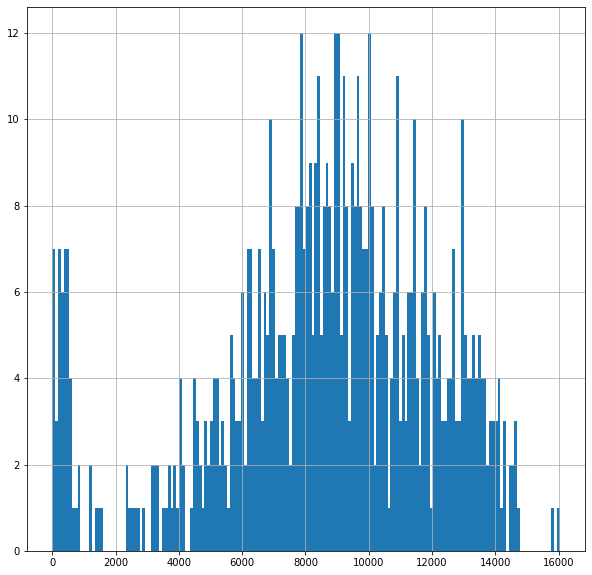

In [207]:
fig = plt.figure(figsize=(10,10))
soir_df_dB.loc[soir_df_dB['CA TTC']<17000,'CA TTC'].hist(bins=180)

### Data Exploration - Daroco Bourse

In [44]:


test2.isnull().sum()

Date                  0
Jour de la semaine    0
Service               0
CA TTC                0
CA HT                 0
TVA                   0
dtype: int64

<AxesSubplot:>

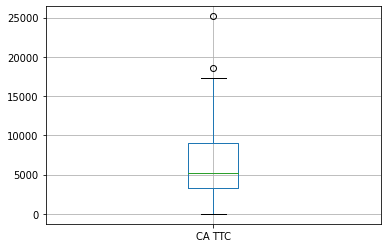

In [45]:
test2[['CA TTC']].boxplot()

In [46]:
test2.loc[test2['CA TTC']>=16000,'CA TTC']

Timestamp
2019-05-11 18:00:00    25174.50
2019-09-26 18:00:00    18602.00
2019-10-16 18:00:00    16032.53
2020-01-16 18:00:00    17299.50
Name: CA TTC, dtype: float64

In [47]:
test2.loc[test2['CA TTC']<=200,'CA TTC']

Timestamp
2019-05-10 12:00:00      0.0
2020-01-27 18:00:00     26.0
2020-02-06 12:00:00      0.0
2020-05-06 12:00:00      0.0
2020-05-09 12:00:00     46.0
2020-05-11 12:00:00     59.0
2020-05-11 18:00:00    121.0
2020-05-12 12:00:00    148.0
2020-05-14 12:00:00     82.0
2020-05-17 12:00:00    109.0
2020-05-21 12:00:00    102.5
2020-05-22 12:00:00    149.0
2020-05-25 12:00:00    124.0
2020-05-27 12:00:00    179.5
2020-05-28 12:00:00    175.0
2020-06-01 12:00:00     98.5
2020-06-02 18:00:00     67.5
2020-06-03 12:00:00     69.5
2020-06-03 18:00:00    146.0
2020-06-04 12:00:00    134.6
2020-06-04 18:00:00     80.0
2020-06-06 12:00:00     53.8
2020-06-07 12:00:00     39.5
2020-06-07 18:00:00    138.5
2020-06-10 12:00:00    129.5
2020-11-20 18:00:00     49.4
2021-03-17 12:00:00      0.0
2021-06-07 12:00:00      0.0
2021-06-08 12:00:00      0.0
2021-06-08 18:00:00      0.0
2021-06-27 18:00:00     28.0
2021-07-03 18:00:00     28.0
Name: CA TTC, dtype: float64

In [48]:
test2.loc[test2['CA TTC']==0,'CA TTC']

Timestamp
2019-05-10 12:00:00    0.0
2020-02-06 12:00:00    0.0
2020-05-06 12:00:00    0.0
2021-03-17 12:00:00    0.0
2021-06-07 12:00:00    0.0
2021-06-08 12:00:00    0.0
2021-06-08 18:00:00    0.0
Name: CA TTC, dtype: float64

array([[<AxesSubplot:title={'center':'CA TTC'}>]], dtype=object)

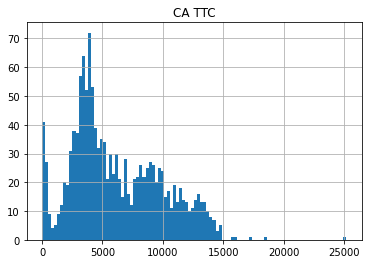

In [49]:
test2[['CA TTC']].hist(bins=100)

<AxesSubplot:xlabel='Timestamp', ylabel='CA TTC'>

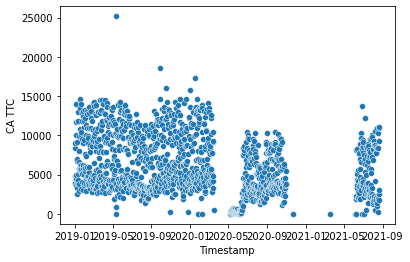

In [50]:

sns.scatterplot(data=test2['CA TTC'])

In [77]:
test2.loc[test2['Date']=='2019-09-26']

,Date,Jour de la semaine,Service,CA TTC,CA HT,TVA
Timestamp,,,,,,
2019-09-26 12:00:00,2019-09-26,Jeudi,midi,4909.6,4422.38,487.22
2019-09-26 18:00:00,2019-09-26,Jeudi,soir,18602.0,16297.99,2304.01


In [85]:
test2.loc[test2['Date']=='2019-05-11']

,Date,Jour de la semaine,Service,CA TTC,CA HT,TVA
Timestamp,,,,,,
2019-05-11 12:00:00,2019-05-11,Samedi,midi,10312.5,9225.83,1086.67
2019-05-11 18:00:00,2019-05-11,Samedi,soir,25174.5,22124.77,3049.73


In [79]:
test_3=df_yes.groupby(['Date']).sum()
test_3

,CA TTC,CA HT,TVA
Date,,,
2019-01-01,8345.0,7385.151515,959.848485
2019-01-02,12984.5,11491.590909,1492.909091
2019-01-03,14860.0,13131.136364,1728.863636
2019-01-04,18793.5,16629.196999,2164.303001
2019-01-05,16222.5,14284.280303,1938.219697
...,...,...,...
2021-08-17,10402.0,9170.606061,1231.393939
2021-08-18,12161.5,10725.075758,1436.424242
2021-08-19,11031.0,9737.551343,1293.448657


array([[<AxesSubplot:title={'center':'CA TTC'}>]], dtype=object)

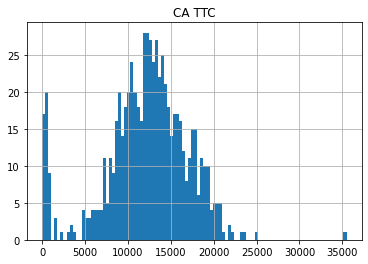

In [81]:
test_3[['CA TTC']].hist(bins=100)

In [121]:
test_3.loc[test_3['CA TTC']>=19000]

,CA TTC,CA HT,TVA
Date,,,
2019-01-17,19283.96,16995.255303,2288.704697
2019-01-18,20052.50,17651.469709,2401.030291
2019-01-19,20250.65,17890.553030,2360.096970
2019-01-26,19169.50,16937.272750,2232.227250
2019-02-02,19258.50,17026.458333,2232.041667
2019-03-09,19459.50,17164.545455,2294.954545
2019-03-21,23129.30,19998.030327,3131.269673
2019-04-06,20644.00,18293.939394,2350.060606
2019-04-11,19358.15,17093.212143,2264.937857


In [127]:
test2.loc[test2['Service']=='midi'].loc[test2['CA TTC']>800]

,Date,Jour de la semaine,Service,CA TTC,CA HT,TVA
Timestamp,,,,,,
2019-01-02 12:00:00,2019-01-02,Mercredi,midi,3939.00,3543.26,395.74
2019-01-03 12:00:00,2019-01-03,Jeudi,midi,4836.00,4311.97,524.03
2019-01-04 12:00:00,2019-01-04,Vendredi,midi,4806.00,4327.35,478.65
2019-01-05 12:00:00,2019-01-05,Samedi,midi,4466.50,3997.73,468.77
2019-01-06 12:00:00,2019-01-06,Dimanche,midi,3654.75,3280.91,373.84
...,...,...,...,...,...,...
2021-08-17 12:00:00,2021-08-17,Mardi,midi,2002.50,1806.44,196.06
2021-08-18 12:00:00,2021-08-18,Mercredi,midi,1865.00,1678.41,186.59
2021-08-19 12:00:00,2021-08-19,Jeudi,midi,1717.50,1544.09,173.41


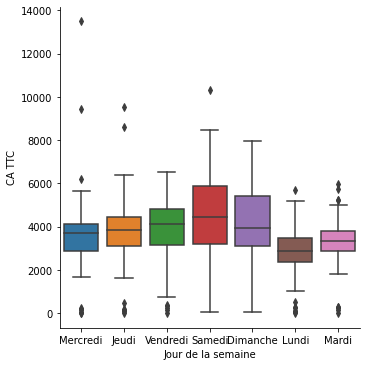

In [214]:
sns.catplot(x='Jour de la semaine', y='CA TTC', data=test2.loc[test2['Service']=='midi'], kind="box");

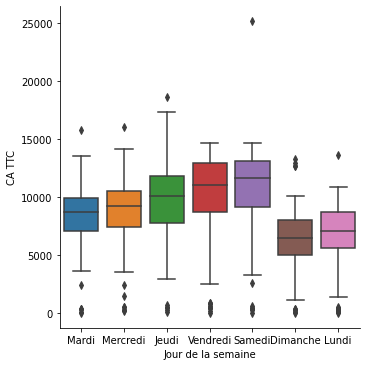

In [215]:
sns.catplot(x='Jour de la semaine', y='CA TTC', data=test2.loc[test2['Service']=='soir'], kind="box");

In [ ]:
test2.loc[test2['Service']=='midi'].loc[test2['CA TTC']>800]

<AxesSubplot:>

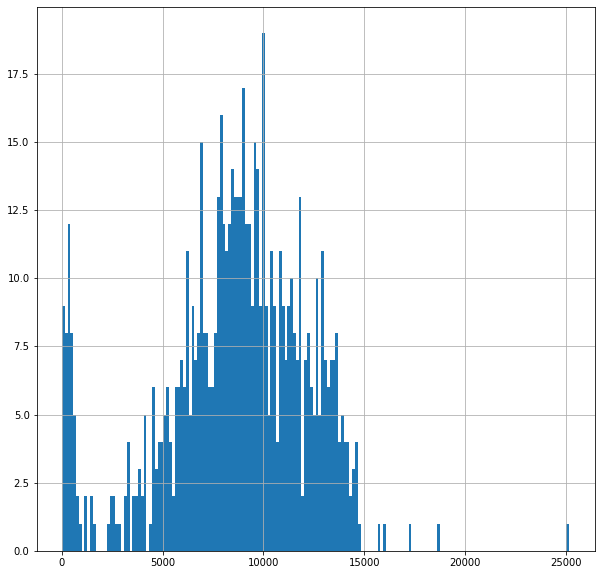

In [193]:
fig = plt.figure(figsize=(10,10))
test2.loc[test2['Service']=='soir','CA TTC'].hist(bins=180)

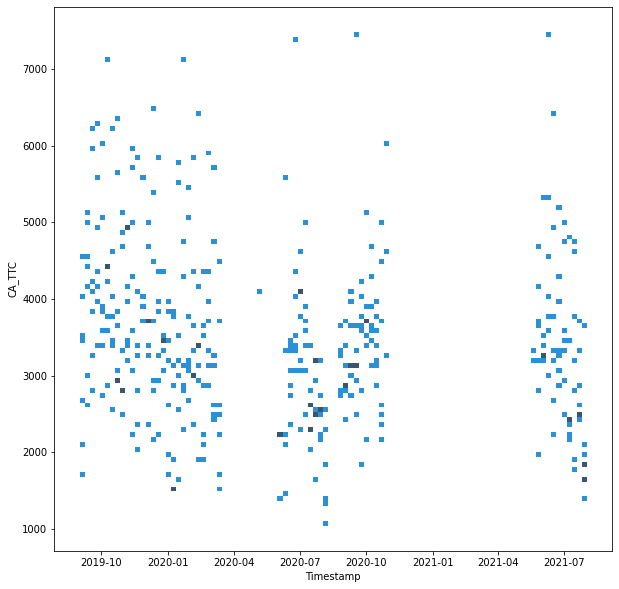

In [158]:
fig = plt.figure(figsize=(10,10))
sns.histplot(x='Timestamp', y='CA_TTC', data=df_dXVI.loc[df_dXVI['service']=='midi'].loc[df_dXVI['CA_TTC']>800],bins=1000);

In [155]:
test2.loc[test2['Service']=='midi','CA TTC'].loc[test2['CA TTC']<740]

Timestamp
2019-05-10 12:00:00      0.0
2020-02-06 12:00:00      0.0
2020-03-16 12:00:00    535.0
2020-05-06 12:00:00      0.0
2020-05-08 12:00:00    251.0
2020-05-09 12:00:00     46.0
2020-05-11 12:00:00     59.0
2020-05-12 12:00:00    148.0
2020-05-14 12:00:00     82.0
2020-05-17 12:00:00    109.0
2020-05-18 12:00:00    275.0
2020-05-20 12:00:00    235.5
2020-05-21 12:00:00    102.5
2020-05-22 12:00:00    149.0
2020-05-25 12:00:00    124.0
2020-05-26 12:00:00    293.5
2020-05-27 12:00:00    179.5
2020-05-28 12:00:00    175.0
2020-05-29 12:00:00    364.0
2020-06-01 12:00:00     98.5
2020-06-02 12:00:00    272.5
2020-06-03 12:00:00     69.5
2020-06-04 12:00:00    134.6
2020-06-05 12:00:00    320.0
2020-06-06 12:00:00     53.8
2020-06-07 12:00:00     39.5
2020-06-08 12:00:00    241.0
2020-06-09 12:00:00    260.0
2020-06-10 12:00:00    129.5
2020-06-11 12:00:00    480.9
2020-06-14 12:00:00    491.8
2021-03-17 12:00:00      0.0
2021-06-07 12:00:00      0.0
2021-06-08 12:00:00      0.0
Name

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'CA TTC'}>],
       [<AxesSubplot:title={'center':'CA HT'}>,
        <AxesSubplot:title={'center':'TVA'}>]], dtype=object)

<Figure size 720x720 with 0 Axes>

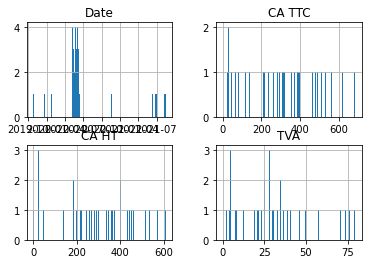

In [156]:
fig = plt.figure(figsize=(10,10))
test2.loc[test2['Service']=='soir'].loc[test2['CA TTC']<740].hist(bins=180)

<AxesSubplot:>

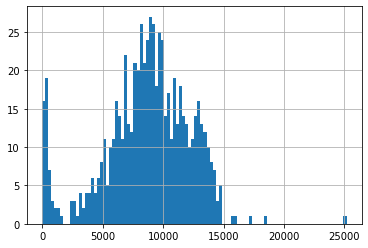

In [91]:
test2.loc[test2['Service']=='soir','CA TTC'].hist(bins=100)

In [120]:
test2.loc[test2['Service']=='soir','CA TTC'].loc[test2['CA TTC']>15000]

Timestamp
2019-05-11 18:00:00    25174.50
2019-09-26 18:00:00    18602.00
2019-10-16 18:00:00    16032.53
2019-12-31 18:00:00    15779.50
2020-01-16 18:00:00    17299.50
Name: CA TTC, dtype: float64

# Data Daroco XVI - CA - Août 2019 à Août 2021

In [252]:
df_dXVI=pd.read_excel('/Users/guillaume/code/tomaymerich14/resto-project/raw_data/CA_DarocoXVI.xlsx')

In [253]:
df_dXVI

,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA
0,2019,12,3,[20h à 21h[,Mardi,1615.5,1434.696970,180.803030
1,2019,12,1,[22h à 23h[,Dimanche,423.5,377.575758,45.924242
2,2019,12,18,[16h à 17h[,Mercredi,12.0,10.909091,1.090909
3,2019,12,5,[23h à 00h[,Jeudi,128.0,113.333333,14.666667
4,2019,12,13,[12h à 13h[,Vendredi,1728.5,1554.318182,174.181818
...,...,...,...,...,...,...,...,...
5460,2020,1,22,[16h à 17h[,Mercredi,5.0,4.545455,0.454545
5461,2020,1,20,[17h à 18h[,Lundi,0.0,0.000000,0.000000
5462,2020,1,25,[21h à 22h[,Samedi,1537.5,1354.924242,182.575758
5463,2020,1,29,[21h à 22h[,Mercredi,1339.0,1188.409091,150.590909


---------variables de preprocessing--------

In [254]:
service_dict = {
    '[09h à 10h[':'midi','[10h à 11h[':'midi','[11h à 12h[':'midi','[12h à 13h[':'midi','[13h à 14h[':'midi',
    '[14h à 15h[':'midi','[15h à 16h[':'midi','[16h à 17h[':'midi','[17h à 18h[':'midi',
    '[18h à 19h[':'soir','[19h à 20h[':'soir','[20h à 21h[':'soir','[21h à 22h[':'soir','[22h à 23h[':'soir',
    '[23h à 00h[':'soir','[00h à 01h[':'soir','[01h à 02h[':'soir','[02h à 03h[':'soir','[03h à 04h[':'soir',
}
Week_days={'Lundi':'Dimanche','Mardi':'Lundi','Mercredi':'Mardi','Jeudi':'Mercredi','Vendredi':'Jeudi','Samedi':'Vendredi','Dimanche':'Samedi'}
Over_night_hours=['[00h à 01h[','[01h à 02h[','[02h à 03h[','[03h à 04h[']

-----------------------
-----------------------

### Data Cleaning and Preprocessing

In [255]:

#----------Adding Datetime Column------------
df_dXVI['Date']=''
for i in range(df_dXVI.shape[0]):
        df_dXVI['Date'][i] = f"{df_dXVI['Jour du mois'][i]}-{df_dXVI['Mois'][i]}-{df_dXVI['Année'][i]}"
df_dXVI['Date']=pd.to_datetime(df_dXVI['Date'],format='%d-%m-%Y',dayfirst=True)
#----------------------------------------

#----------Mapping chaque Tranche Horaire à un Service [Midi] ou [Soir]------- 
df_dXVI['Service']=df_dXVI['Tranche Horaire'].map(service_dict)
#-----------------------------------------

#----------Recalage des Date en fonction des tranches horaires qui dépassent minuit------- 
df_dXVI['Date']=np.where(df_dXVI['Tranche Horaire']=='[00h à 01h[',df_dXVI['Date']- pd.offsets.Day(1),df_dXVI['Date'])
df_dXVI['Date']=np.where(df_dXVI['Tranche Horaire']=='[01h à 02h[',df_dXVI['Date']- pd.offsets.Day(1),df_dXVI['Date'])
df_dXVI['Date']=np.where(df_dXVI['Tranche Horaire']=='[02h à 03h[',df_dXVI['Date']- pd.offsets.Day(1),df_dXVI['Date'])
df_dXVI['Date']=np.where(df_dXVI['Tranche Horaire']=='[03h à 04h[',df_dXVI['Date']- pd.offsets.Day(1),df_dXVI['Date'])
#-----------------------------------------

#----------Drop Colonnes maintenant redondantes-------------- 
df_dXVI=df_dXVI.drop(columns=['Année','Mois','Jour du mois'])
#------------------------------------------


#--------------Recalage des Jours de la semaine en fonction des tranches horaires qui dépassent minuit--
df_dXVI.loc[df_dXVI['Tranche Horaire'] == '[00h à 01h[','Jour de la semaine']=\
df_dXVI.loc[df_dXVI['Tranche Horaire'] == '[00h à 01h[']['Jour de la semaine'].map(Week_days)

df_dXVI.loc[df_dXVI['Tranche Horaire'] == '[01h à 02h[','Jour de la semaine']=\
df_dXVI.loc[df_dXVI['Tranche Horaire'] == '[01h à 02h[']['Jour de la semaine'].map(Week_days)

df_dXVI.loc[df_dXVI['Tranche Horaire'] == '[02h à 03h[','Jour de la semaine']=\
df_dXVI.loc[df_dXVI['Tranche Horaire'] == '[02h à 03h[']['Jour de la semaine'].map(Week_days)

df_dXVI.loc[df_dXVI['Tranche Horaire'] == '[03h à 04h[','Jour de la semaine']=\
df_dXVI.loc[df_dXVI['Tranche Horaire'] == '[03h à 04h[']['Jour de la semaine'].map(Week_days)
#----------------------------------

#----------------Adding unique 'Timestamp' index for each service with [hour=12] or [hour=18]-------------
df_dXVI['Timestamp']=np.where(df_dXVI['Service']=='midi',\
                              df_dXVI['Date']+pd.tseries.offsets.DateOffset(hours=12),\
                              df_dXVI['Date']+pd.tseries.offsets.DateOffset(hours=18))
df_dXVI=df_dXVI.set_index('Timestamp')
df_dXVI.sort_index(inplace=True)
#-----------------------------------------------------------

#-------------------Sum() Groupby on Timestamp------------------
df_dXVI=df_dXVI.groupby(['Timestamp','Date','Jour de la semaine','Service']).sum()
#----------------------------------

#-------------------rounding------
df_dXVI['CA HT']=round(df_dXVI['CA HT'],2)
df_dXVI['TVA']=round(df_dXVI['TVA'],2)
#----------------------------------

#-------------Setting Correct unique 'Timestamp' index
df_dXVI=df_dXVI.reset_index(level=[1,2,3])
#------------------------------------------

#-------------Renaming Columns-------
df_dXVI=df_dXVI.rename(columns={"Date": "date", "Jour de la semaine": "jour","Service":"service","CA TTC":"CA_TTC","CA HT":"CA_HT"})
#-------------



#----------------------------------------#----------------------------------------
#----------Drop LIGNES DE MIDI DE XVI OUTLIERS-------------- #----------------------------------------
midi_df_dXVI = df_dXVI[ df_dXVI['service'] == 'midi' ]

midi_df_dXVI_index_CA_petit=midi_df_dXVI[ midi_df_dXVI['CA_TTC'] < 600 ].index
df_dXVI=df_dXVI.drop(midi_df_dXVI_index_CA_petit)

midi_df_dXVI_index_CA_grand=midi_df_dXVI[ midi_df_dXVI['CA_TTC'] > 7000 ].index
df_dXVI=df_dXVI.drop(midi_df_dXVI_index_CA_grand)
#----------------------------------------#----------------------------------------
#----------------------------------------#----------------------------------------

#----------------------------------------#----------------------------------------
#----------Drop LIGNES DE SOIR DE XVI OUTLIERS-------------- #----------------------------------------

soir_df_dXVI = df_dXVI[ df_dXVI['service'] == 'soir' ]

soir_df_dXVI_index_CA_petit=soir_df_dXVI[ soir_df_dXVI['CA_TTC'] < 700 ].index
print(len(soir_df_dXVI_index_CA_petit))
df_dXVI=df_dXVI.drop(soir_df_dXVI_index_CA_petit)


soir_df_dXVI_index_CA_grand=soir_df_dXVI[ soir_df_dXVI['CA_TTC'] > 14000 ].index
print(len(soir_df_dXVI_index_CA_grand))
df_dXVI=df_dXVI.drop(soir_df_dXVI_index_CA_grand)

#----------------------------------------#----------------------------------------
#----------------------------------------#----------------------------------------


/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_18933/2467666502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dXVI['Date'][i] = f"{df_dXVI['Jour du mois'][i]}-{df_dXVI['Mois'][i]}-{df_dXVI['Année'][i]}"


15
4


In [256]:
!pwd

/Users/guillaume/code/tomaymerich14/resto-project/notebooks


In [257]:
df_dXVI

,date,jour,service,CA_TTC,CA_HT,TVA
Timestamp,,,,,,
2019-08-28 18:00:00,2019-08-28,Mercredi,soir,1723.75,1530.14,193.61
2019-08-29 18:00:00,2019-08-29,Jeudi,soir,3053.68,2687.09,366.59
2019-08-30 18:00:00,2019-08-30,Vendredi,soir,3779.50,3321.91,457.59
2019-08-31 18:00:00,2019-08-31,Samedi,soir,3747.87,3318.51,429.36
2019-09-01 12:00:00,2019-09-01,Dimanche,midi,3548.00,3191.82,356.18
...,...,...,...,...,...,...
2021-07-30 12:00:00,2021-07-30,Vendredi,midi,1361.00,1229.24,131.76
2021-07-30 18:00:00,2021-07-30,Vendredi,soir,7058.00,6263.03,794.97
2021-07-31 12:00:00,2021-07-31,Samedi,midi,1655.50,1496.52,158.98


In [58]:
#df_dXVI.to_csv(r'/Users/guillaume/code/tomaymerich14/resto-project/raw_data/df_DXVI.csv',index=False);

### Data Exploration - Daroco XVI

In [59]:
df_dXVI.isnull().sum()

date       0
jour       0
service    0
CA_TTC     0
CA_HT      0
TVA        0
dtype: int64

<AxesSubplot:>

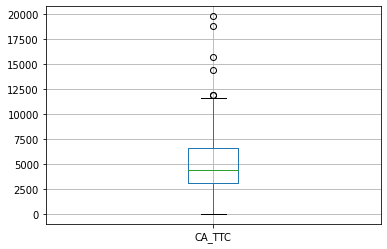

In [61]:
df_dXVI[['CA_TTC']].boxplot()

In [78]:
df_dXVI.loc[df_dXVI['CA_TTC']>=14000,'CA_TTC']

Timestamp
2019-10-03 18:00:00    19747.00
2019-12-12 18:00:00    14387.40
2020-01-09 18:00:00    18733.00
2020-01-24 18:00:00    15650.79
Name: CA_TTC, dtype: float64

In [63]:
df_dXVI.loc[df_dXVI['CA_TTC']<=200,'CA_TTC']

Timestamp
2019-08-27 12:00:00      0.0
2019-08-27 18:00:00     59.5
2019-08-28 12:00:00      0.0
2019-08-29 12:00:00      0.0
2019-08-30 12:00:00      0.0
2019-11-24 12:00:00     75.0
2019-11-25 18:00:00    145.0
2019-11-26 12:00:00      6.0
2019-12-25 18:00:00     22.0
2020-01-27 18:00:00     35.0
2020-03-16 18:00:00     65.0
2020-05-08 12:00:00    128.0
2020-05-12 12:00:00     61.0
2020-05-16 12:00:00    184.0
2020-05-18 12:00:00    137.0
2020-05-24 12:00:00    124.0
2020-05-25 12:00:00    141.0
2020-05-27 12:00:00    121.0
2020-06-01 18:00:00      0.0
2020-06-12 18:00:00     58.0
2020-10-26 12:00:00    145.0
Name: CA_TTC, dtype: float64

In [64]:
df_dXVI.loc[df_dXVI['CA_TTC']==0,'CA_TTC']

Timestamp
2019-08-27 12:00:00    0.0
2019-08-28 12:00:00    0.0
2019-08-29 12:00:00    0.0
2019-08-30 12:00:00    0.0
2020-06-01 18:00:00    0.0
Name: CA_TTC, dtype: float64

<AxesSubplot:xlabel='CA_TTC', ylabel='Count'>

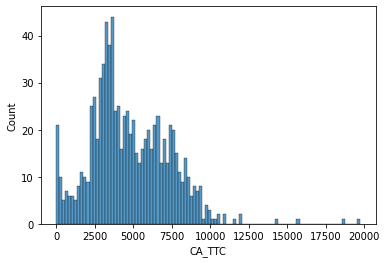

In [65]:
sns.histplot(data=df_dXVI['CA_TTC'],bins=100)

<AxesSubplot:xlabel='Timestamp', ylabel='CA_TTC'>

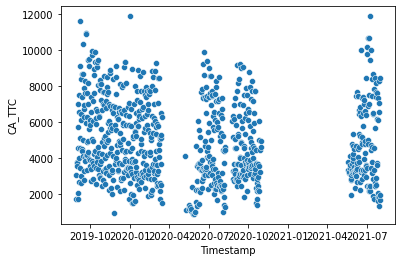

In [144]:
sns.scatterplot(data=df_dXVI['CA_TTC'].loc[df_dXVI['CA_TTC']>900].loc[df_dXVI['CA_TTC']<13500])

<AxesSubplot:xlabel='CA_TTC', ylabel='Count'>

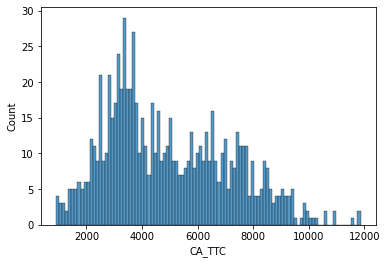

In [143]:
sns.histplot(data=df_dXVI['CA_TTC'].loc[df_dXVI['CA_TTC']>900].loc[df_dXVI['CA_TTC']<13500],bins=100)

In [67]:
days=df_dXVI['jour'].unique()


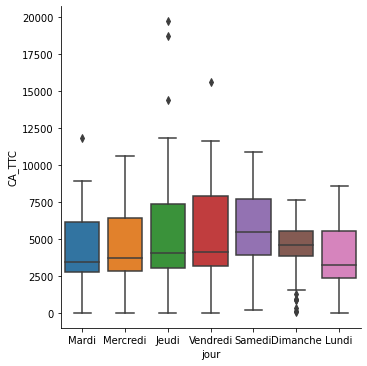

In [69]:
sns.catplot(x='jour', y='CA_TTC', data=df_dXVI, kind="box");

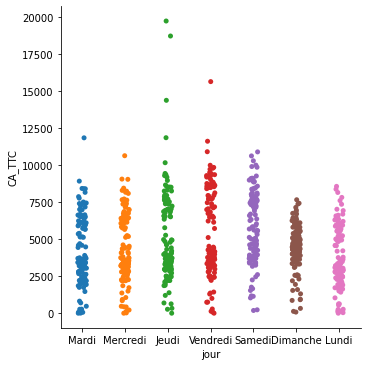

In [70]:
sns.catplot(x='jour', y='CA_TTC', data=df_dXVI)

<AxesSubplot:xlabel='jour', ylabel='CA_TTC'>

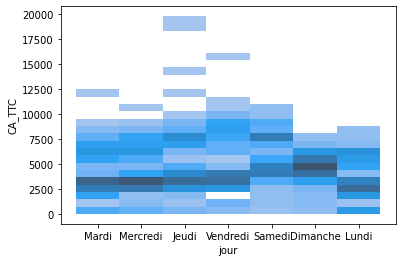

In [71]:
sns.histplot(x='jour',y='CA_TTC',data=df_dXVI)

In [73]:
df_dXVI.CA_TTC.describe()

count      847.000000
mean      4756.142349
std       2546.136146
min          0.000000
25%       3055.590000
50%       4351.000000
75%       6544.500000
max      19747.000000
Name: CA_TTC, dtype: float64

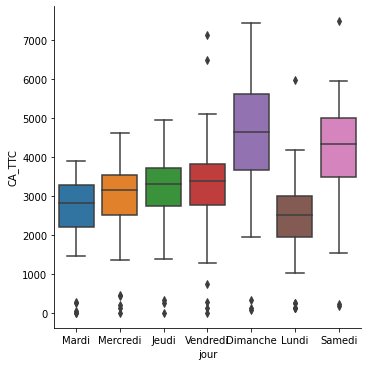

In [219]:
sns.catplot(x='jour', y='CA_TTC', data=df_dXVI.loc[df_dXVI['service']=='midi'], kind="box");

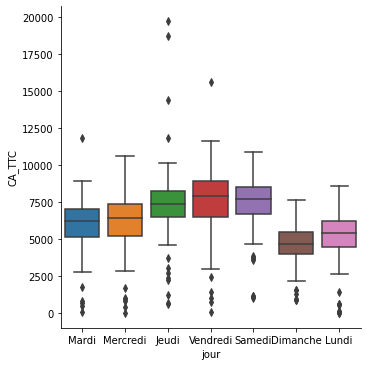

In [220]:
sns.catplot(x='jour', y='CA_TTC', data=df_dXVI.loc[df_dXVI['service']=='soir'], kind="box");

In [232]:
len(df_dXVI.loc[df_dXVI['service']=='midi'].loc[df_dXVI['CA_TTC']>7000])

5

In [210]:
df_dBourse=pd.read_excel('/Users/guillaume/code/tomaymerich14/resto-project/raw_data/CA_DarocoBourse.xlsx')

#----------VARIABLES DE PREPRO------------
service_dict = {
    '[09h à 10h[':'midi','[10h à 11h[':'midi','[11h à 12h[':'midi','[12h à 13h[':'midi','[13h à 14h[':'midi',
    '[14h à 15h[':'midi','[15h à 16h[':'midi','[16h à 17h[':'midi','[17h à 18h[':'midi',
    '[18h à 19h[':'soir','[19h à 20h[':'soir','[20h à 21h[':'soir','[21h à 22h[':'soir','[22h à 23h[':'soir',
    '[23h à 00h[':'soir','[00h à 01h[':'soir','[01h à 02h[':'soir','[02h à 03h[':'soir','[03h à 04h[':'soir',
}
Week_days={'Lundi':'Dimanche','Mardi':'Lundi','Mercredi':'Mardi','Jeudi':'Mercredi','Vendredi':'Jeudi','Samedi':'Vendredi','Dimanche':'Samedi'}
Over_night_hours=['[00h à 01h[','[01h à 02h[','[02h à 03h[','[03h à 04h[']

#----------------------------------------



#----------Adding Datetime Column------------
df_dBourse['Date']=''
for i in range(df_dBourse.shape[0]):
        df_dBourse['Date'][i] = f"{df_dBourse['Jour du mois'][i]}-{df_dBourse['Mois'][i]}-{df_dBourse['Année'][i]}"
df_dBourse['Date']=pd.to_datetime(df_dBourse['Date'],format='%d-%m-%Y',dayfirst=True)
#----------------------------------------

#----------Mapping chaque Tranche Horaire à un Service [Midi] ou [Soir]------- 
df_dBourse['Service']=df_dBourse['Tranche Horaire'].map(service_dict)
#-----------------------------------------

#----------Recalage des Date en fonction des tranches horaires qui dépassent minuit------- 
df_dBourse['Date']=np.where(df_dBourse['Tranche Horaire']=='[00h à 01h[',df_dBourse['Date']- pd.offsets.Day(1),df_dBourse['Date'])
df_dBourse['Date']=np.where(df_dBourse['Tranche Horaire']=='[01h à 02h[',df_dBourse['Date']- pd.offsets.Day(1),df_dBourse['Date'])
df_dBourse['Date']=np.where(df_dBourse['Tranche Horaire']=='[02h à 03h[',df_dBourse['Date']- pd.offsets.Day(1),df_dBourse['Date'])
df_dBourse['Date']=np.where(df_dBourse['Tranche Horaire']=='[03h à 04h[',df_dBourse['Date']- pd.offsets.Day(1),df_dBourse['Date'])
#-----------------------------------------

#----------Drop Colonnes maintenant redondantes-------------- 
df_dBourse=df_dBourse.drop(columns=['Année','Mois','Jour du mois'])
#------------------------------------------



#--------------Recalage des Jours de la semaine en fonction des tranches horaires qui dépassent minuit--
df_dBourse.loc[df_dBourse['Tranche Horaire'] == '[00h à 01h[','Jour de la semaine']=\
df_dBourse.loc[df_dBourse['Tranche Horaire'] == '[00h à 01h[']['Jour de la semaine'].map(Week_days)

df_dBourse.loc[df_dBourse['Tranche Horaire'] == '[01h à 02h[','Jour de la semaine']=\
df_dBourse.loc[df_dBourse['Tranche Horaire'] == '[01h à 02h[']['Jour de la semaine'].map(Week_days)

df_dBourse.loc[df_dBourse['Tranche Horaire'] == '[02h à 03h[','Jour de la semaine']=\
df_dBourse.loc[df_dBourse['Tranche Horaire'] == '[02h à 03h[']['Jour de la semaine'].map(Week_days)

df_dBourse.loc[df_dBourse['Tranche Horaire'] == '[03h à 04h[','Jour de la semaine']=\
df_dBourse.loc[df_dBourse['Tranche Horaire'] == '[03h à 04h[']['Jour de la semaine'].map(Week_days)
#----------------------------------

#----------------Adding unique 'Timestamp' index for each service with [hour=12] or [hour=18]-------------
df_dBourse['Timestamp']=np.where(df_dBourse['Service']=='midi',\
                              df_dBourse['Date']+pd.tseries.offsets.DateOffset(hours=12),\
                              df_dBourse['Date']+pd.tseries.offsets.DateOffset(hours=18))
df_dBourse=df_dBourse.set_index('Timestamp')
df_dBourse.sort_index(inplace=True)
#-----------------------------------------------------------

#-------------------Sum() Groupby on Timestamp------------------
df_dBourse=df_dBourse.groupby(['Timestamp','Date','Jour de la semaine','Service']).sum()
#----------------------------------

#-------------------rounding------
df_dBourse['CA HT']=round(df_dBourse['CA HT'],2)
df_dBourse['TVA']=round(df_dBourse['TVA'],2)
#----------------------------------

#-------------Setting Correct unique 'Timestamp' index
df_dBourse=df_dBourse.reset_index(level=[1,2,3])
#------------------------------------------

#-------------Renaming Columns-------
df_dBourse=df_dBourse.rename(columns={"Date": "date", "Jour de la semaine": "jour","Service":"service","CA TTC":"CA_TTC","CA HT":"CA_HT"})
#-------------



#----------------------------------------#----------------------------------------
#----------Drop PREMIERE LIGNE DE BOURSE-------------- #----------------------------------------
df_dBourse=df_dBourse.sort_values(by='date')
df_dBourse=df_dBourse.iloc[1: , :]
#----------------------------------------#----------------------------------------
#----------------------------------------#----------------------------------------


#----------------------------------------#----------------------------------------
#----------Drop LIGNES DE MIDI DE BOURSE OUTLIERS-------------- #----------------------------------------
midi_df_dBourse = df_dBourse[ df_dBourse['service'] == 'midi' ]
midi_df_dB_index_CA_petit=midi_df_dBourse[ midi_df_dBourse['CA_TTC'] < 500 ].index
df_dBourse=df_dBourse.drop(midi_df_dB_index_CA_petit)

midi_df_dB_index_CA_grand=midi_df_dB[ midi_df_dB['CA TTC'] > 8500 ].index
df_dBourse=df_dBourse.drop(midi_df_dB_index_CA_grand)
#----------------------------------------#----------------------------------------
#----------------------------------------#----------------------------------------

#----------------------------------------#----------------------------------------
#----------Drop LIGNES DE SOIR DE BOURSE OUTLIERS-------------- #----------------------------------------

soir_df_dBourse = df_dBourse[ df_dBourse['service'] == 'soir' ]

soir_df_dB_index_CA_petit=soir_df_dBourse[ soir_df_dBourse['CA_TTC'] < 650 ].index
df_dBourse=df_dBourse.drop(soir_df_dB_index_CA_petit)


soir_df_dB_index_CA_grand=soir_df_dBourse[ soir_df_dBourse['CA_TTC'] > 17000 ].index
df_dBourse=df_dBourse.drop(soir_df_dB_index_CA_grand)

#----------------------------------------#----------------------------------------
#----------------------------------------#----------------------------------------


/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_18933/2607116013.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dBourse['Date'][i] = f"{df_dBourse['Jour du mois'][i]}-{df_dBourse['Mois'][i]}-{df_dBourse['Année'][i]}"


In [211]:
df_dBourse

,date,jour,service,CA_TTC,CA_HT,TVA
Timestamp,,,,,,
2019-01-01 18:00:00,2019-01-01,Mardi,soir,8345.0,7385.15,959.85
2019-01-02 12:00:00,2019-01-02,Mercredi,midi,3939.0,3543.26,395.74
2019-01-02 18:00:00,2019-01-02,Mercredi,soir,9045.5,7948.33,1097.17
2019-01-03 12:00:00,2019-01-03,Jeudi,midi,4836.0,4311.97,524.03
2019-01-03 18:00:00,2019-01-03,Jeudi,soir,10024.0,8819.17,1204.83
...,...,...,...,...,...,...
2021-08-19 18:00:00,2021-08-19,Jeudi,soir,9313.5,8193.46,1120.04
2021-08-20 12:00:00,2021-08-20,Vendredi,midi,2539.0,2259.17,279.83
2021-08-20 18:00:00,2021-08-20,Vendredi,soir,10948.5,9639.85,1308.65


In [ ]:
#df_dBourse.to_csv(r'/Users/guillaume/code/tomaymerich14/resto-project/raw_data/df_dBourse.csv',index=False);

In [ ]:
#1359 to 1321 drop midi bourse
#1321 to 1277    drop soir bourse
